<a href="https://colab.research.google.com/github/nivedita98/wine_dataset/blob/main/214161015_214161010MLLab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question1
1. Application of the Perceptron in Classification of Normal and Shouted Speech using MFCC features. These features are extracted from speech samples of a number of speakers uttering a few sentences normally or by shouting. The features are divided into train-test splits and are made available in two csv files(use the dataset of Assignment 8). You are tasked to learn a discriminative model to classify normal and shouted speech. This example uses Perceptron as a discriminative model. Consider the .csv file “Train_file.csv” containing 86060 instances of 61-dimensional arrays. The first 60 dimensions of the array contain the feature values for a particular instance and the last dimension contains its label. The label can be either ’0’ or ‘1’.

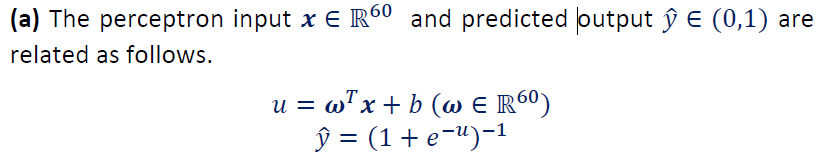
Learn the weight vector 𝝎 and bias 𝑏 from the train dataset (Train_file.csv). Do not use any Scikit-Learn functions. Write your own functions for perceptron learning.
(b) Read “Test_file.csv” consisting of 21516 instances of 61 dimensional arrays. For each array, the first 60 dimensions contain the feature values for the test data and the last dimension contains its actual label. Predict
the label of each data instance from the testing set using the learned perceptron and compare the predicted and actual labels. Report the class-wise F1-scores for both classes and the overall accuracy.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from imblearn.over_sampling import KMeansSMOTE
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
train_data=pd.read_csv('Train_file.csv',header=None)
test_data =pd.read_csv('Test_file.csv', header=None)
print(test_data.head())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


          0         1         2         3         4         5         6   \
0   3.863817 -4.783144 -3.905487 -0.535617 -1.551824 -1.499466 -0.859588   
1 -10.056757 -5.685840 -0.045440 -1.810329  3.860155 -0.612230 -1.352859   
2  -1.752938 -2.699559  1.510144  0.081531 -1.604532 -1.849043 -2.171057   
3  -3.170220 -4.744630  3.362495 -2.200058 -3.640497 -0.942428 -3.085365   
4  -3.519579 -3.659691  3.410805  0.665115 -5.036384 -3.107760 -1.921138   

         7         8         9   ...        51        52        53        54  \
0  0.372485 -0.649211 -0.391779  ...  0.009052  0.058107 -0.094742  0.021947   
1 -0.210533  0.592775 -0.093317  ...  0.100559  0.015884 -0.046483  0.082804   
2 -3.236153 -0.541043  0.442342  ... -0.070303 -0.012252  0.052579 -0.022195   
3  0.144203 -1.065229  0.425932  ...  0.193836 -0.050392  0.120305 -0.158155   
4 -0.518617  0.085033 -2.412228  ...  0.035903 -0.045471 -0.105559  0.017580   

         55        56        57        58        59   60  
0  

In [ ]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    u=np.dot(self.w, x)+self.b
    z= 1/(1+np.exp(-u))
    if z>=0.5:
        return 1.0
    else:
        return 0.0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

In [ ]:
perceptron = Perceptron()

In [ ]:
X_train=train_data.iloc[:,:60]
Y_train=train_data.iloc[:,60]

In [ ]:
X_train=X_train.values
Y_train=Y_train.values

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(73972, 60)
(73972,)


C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow e

C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow encountered in exp
  z= 1/(1+np.exp(-u))
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/45100853.py:9: RuntimeWarning: overflow e

0.8020915640250987


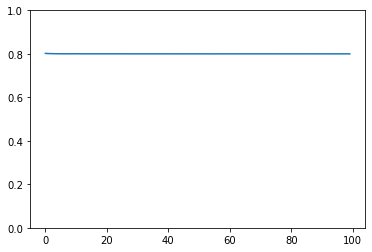

In [ ]:
wt_matrix = perceptron.fit(X_train, Y_train, 100, 0.01)

In [ ]:
X_test=test_data.iloc[:,:60]
Y_test=test_data.iloc[:,60]

In [ ]:
X_test=X_test.values
Y_test=Y_test.values

In [ ]:
Y_pred_test=perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

0.7963840862613869


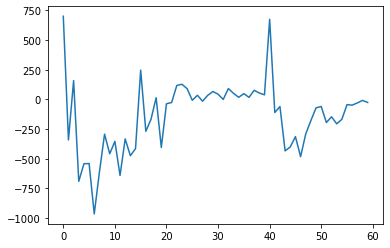

In [ ]:
plt.plot(wt_matrix[-1,:])
plt.show()

#Using Gradient Descent in Perceptron learning algorithm

In [ ]:
class Perceptron:
    
  
    def __init__ (self):
        self.w = None
        self.b = None
  
    def f(w,b,x):
        return 1.0/(1.0 +np.exp(-(np.dot(w, x)+ b)))
    def model(self, x):
        u=np.dot(self.w, x)+self.b
        z= 1/(1+np.exp(-u))
        if z>=0.5:
            return 1.0
        else:
            return 0.0
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)  
#     def error(w,b):
#         err=0.0
#         for x, y in zip(X,Y):
#             fx=f(w,b,x)
#             err+= 0.5 *(fx-y)**2
#         return err
   
    def grad_b(w,b,x,y):
        fx= f(w,b,x)
        return (fx-y) * fx * (1-fx) 
  
    def grad_w(w,b,x,y):
        fx=f(w,b,x)
        return (fx-y) * fx * (1- fx) * x

    def fit(self, X, Y, epochs = 1, lr = 1):
    
        self.w = np.ones(X.shape[1])
        self.b = 0
    
        accuracy = {}
        max_accuracy = 0
    
        wt_matrix = []
#         self.w =np.random.uniform(-((6/60)**0.5),size=61)
#         self.b =np.random.uniform(-((6/60)**0.5),size=61)
        for i in range(epochs):
        
            dw,db = 0,0
            
            for x, y in zip(X, Y):
                dw += grad_w(self.w,self.b,x,y)
                db += grad_b(self.w,self.b,x,y)
            self.w = self.w - lr * dw
            self.b = self.b - lr * db

            wt_matrix.append(self.w)    

            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b

        self.w = chkptw
        self.b = chkptb

        print(max_accuracy)

        plt.plot(accuracy.values())
        plt.ylim([0, 1])
        plt.show()

        return np.array(wt_matrix)


In [ ]:
perceptron=Perceptron()

In [ ]:
X_train=train_data.iloc[:,:60]
Y_train=train_data.iloc[:,60]

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(73972, 60)
(73972,)


In [ ]:
wt_matrix = perceptron.fit(X_train, Y_train, 100, 0.01)

ValueError: ignored

In [ ]:
Y_pred_test=perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, Y_test))

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

#Question2 
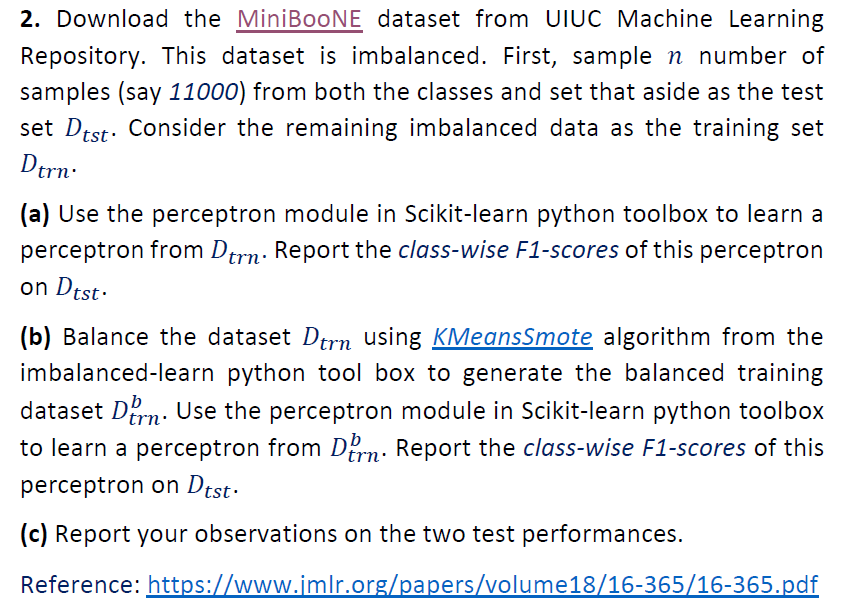

In [ ]:
import pandas as pd
df1=pd.read_csv('MiniBooNE_PID.csv',header=None)


In [ ]:
df1.shape

(130065, 50)

In [ ]:
signal=df1.iloc[:36499,:]
signal["target"]=1
print(signal.head())
background=df1.iloc[36499:,:]
background["target"]=0
print(signal.shape)
print(background.shape)

      0      1      2      3        4      5      6      7     8      9  ...  \
0  0.00  1.000    2.0  3.000  4.00000  5.000  6.000  7.000  8.00  9.000  ...   
1  2.59  0.469   20.7  0.323  0.00968  0.374  0.803  0.897  3.60  0.249  ...   
2  3.86  0.646   18.1  0.234  0.03070  0.361  1.070  0.879  3.59  0.201  ...   
3  3.39  1.200   36.1  0.201  0.01730  0.261  1.110  0.884  3.43  0.177  ...   
4  4.29  0.510  674.0  0.282  0.00917  0.000  0.999  0.823  3.16  0.172  ...   

     41      42     43        44       45      46      47       48      49  \
0  41.0  42.000  43.00  44.00000  45.0000  46.000  47.000  48.0000  49.000   
1 -31.4   0.442   5.86   0.00000   0.0905   0.177   0.458   0.0718   0.246   
2  46.0  -0.479   6.11   0.00118   0.0918  -0.466   0.936   0.3340   0.231   
3 -11.6  -0.297   8.27   0.00385   0.1420  -0.211   1.010   0.2560   0.181   
4 -18.5   0.454   2.48   0.00000   0.1810   0.408   4.340   0.4730   0.259   

   target  
0       1  
1       1  
2       1  
3 

C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/1516511476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signal["target"]=1
C:\Users\shubh\AppData\Local\Temp/ipykernel_3116/1516511476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  background["target"]=0


In [ ]:
signal11000=signal.iloc[:11000,:]
background11000=background.iloc[:11000,:]
type(signal11000)

pandas.core.frame.DataFrame

In [ ]:
test = pd.concat([signal11000, background11000], axis=0)
test=test.sample(frac=1).reset_index(drop=True)
print(test.head())
print(test.shape)

      0      1       2      3        4      5     6      7     8      9  ...  \
0  4.70  1.160  139.00  0.289  0.00176  0.128  1.27  0.903  3.18  0.169  ...   
1  4.12  0.719    7.84  0.229  0.01250  0.473  1.49  0.815  3.39  0.207  ...   
2  3.35  0.941   17.20  0.210  0.01900  0.449  1.83  0.872  3.46  0.268  ...   
3  3.11  0.194  105.00  0.235  0.02880  0.275  1.17  0.947  3.10  0.159  ...   
4  6.45  1.380  153.00  0.374  0.00260  0.000  1.29  0.727  3.54  0.161  ...   

      41      42    43        44      45     46     47      48     49  target  
0  17.70  0.6540  2.58  0.000000  0.1920  0.190  2.790  2.0500  0.236       0  
1  -7.02  0.4610  5.68  0.000000  0.1380 -0.114  1.820  0.4740  0.252       1  
2  10.80  0.0339  4.23  0.001580  0.0759 -0.132  0.805  0.3610  0.237       1  
3  34.40  0.0248  2.13  0.000901  0.1750 -0.282  1.280 -0.0333  0.299       1  
4 -18.50  1.1000  5.81  0.000000  0.3440 -0.408  7.660  4.2800  0.182       0  

[5 rows x 51 columns]
(22000, 51)


In [ ]:
sigtrain=signal.iloc[11000:,:]
backtrain=background.iloc[11000:,:]
print(sigtrain.shape)

(25499, 51)


In [ ]:
train = pd.concat([sigtrain, backtrain], axis=0)
train=train.sample(frac=1).reset_index(drop=True)
print(train.head())
print(train.shape)

      0      1      2      3        4      5      6      7     8      9  ...  \
0  3.67  1.050  134.0  0.252  0.00315  0.162  0.810  0.816  3.35  0.141  ...   
1  5.65  1.610  127.0  0.335  0.00000  0.114  0.778  0.737  3.33  0.209  ...   
2  5.26  0.344   97.1  0.284  0.03560  0.260  1.080  0.794  3.49  0.141  ...   
3  3.49  0.344  461.0  0.232  0.04380  0.153  1.370  0.920  3.37  0.170  ...   
4  5.86  1.280  153.0  0.467  0.00000  0.000  0.816  0.778  3.55  0.133  ...   

     41     42    43       44     45      46    47      48     49  target  
0 -17.9  1.260  4.50  0.00000  0.156  0.0125  1.07  1.2100  0.281       0  
1 -90.8 -0.424  3.75  0.00000  0.211 -0.3560  7.17  0.1430  0.202       0  
2 -17.2 -0.520  2.02  0.00891  0.174 -0.9970  6.36  1.9200  0.228       0  
3  24.3 -0.366  5.13  0.00292  0.216 -0.7270  1.31 -0.0424  0.213       1  
4 -49.8  0.191  4.51  0.00000  0.336 -0.0325  5.70  5.6700  0.214       0  

[5 rows x 51 columns]
(108065, 51)


In [ ]:
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(50,1)
        self.sigmoid = torch.nn.Sigmoid() 
    def forward(self, x):
        output = self.fc(x)
        output_pred = self.sigmoid(output) 
        return output_pred

In [ ]:
model= Perceptron()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [ ]:
train.values

array([[3.67e+00, 1.05e+00, 1.34e+02, ..., 1.21e+00, 2.81e-01, 0.00e+00],
       [5.65e+00, 1.61e+00, 1.27e+02, ..., 1.43e-01, 2.02e-01, 0.00e+00],
       [5.26e+00, 3.44e-01, 9.71e+01, ..., 1.92e+00, 2.28e-01, 0.00e+00],
       ...,
       [5.46e+00, 1.78e+00, 1.03e+02, ..., 1.58e-01, 2.17e-01, 0.00e+00],
       [6.05e+00, 2.49e+00, 1.13e+02, ..., 3.24e+00, 2.00e-01, 0.00e+00],
       [3.97e+00, 6.69e-01, 5.47e+02, ..., 8.68e-01, 2.47e-01, 1.00e+00]])

In [ ]:
xtrain.shape

torch.Size([108065, 50])

In [ ]:
xtrain = torch.tensor(train.iloc[:,:50].values)
ytrain = torch.tensor(train.iloc[:,50].values)
xtest = torch.tensor(test.iloc[:,:50].values)
ytest = torch.tensor(test.iloc[:,50].values)

In [ ]:
ytest.shape

torch.Size([22000])

In [ ]:
model.train()
epoch = 1001
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(xtrain.float())
    # Compute Loss
    loss = criterion(y_pred.squeeze(), ytrain.float())
    if(epoch%100==0):
           print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 35.544097900390625
Epoch 100: train loss: 11.465630531311035
Epoch 200: train loss: 11.277571678161621
Epoch 300: train loss: 11.170860290527344
Epoch 400: train loss: 11.155012130737305
Epoch 500: train loss: 11.035698890686035
Epoch 600: train loss: 10.985682487487793
Epoch 700: train loss: 11.075886726379395
Epoch 800: train loss: 11.124734878540039
Epoch 900: train loss: 11.056951522827148
Epoch 1000: train loss: 11.060623168945312


In [ ]:
model.eval()
y_pred_test=[]
y_pred = model(xtest.float()).squeeze()
for i in y_pred:
    if i>0.5:
        y_pred_test.append(1)
    else:
        y_pred_test.append(0)
y_pred_test=np.asarray(y_pred_test).astype(np.float32) 
print(y_pred_test)
ytest=np.asarray(ytest).astype(np.float32)
F1score = f1_score(ytest,y_pred_test,average = None)
print("F-1 Score before applying KSMOTE: ",F1score)

[0. 1. 1. ... 1. 0. 0.]
F-1 Score before applying KSMOTE:  [0.79231684 0.67279326]


In [ ]:
sm = KMeansSMOTE(random_state=1)
X_new, y_new = sm.fit_resample(xtrain,ytrain)
X_new = torch.tensor(X_new)
y_new = torch.tensor(y_new)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [ ]:
model.train()
epoch = 501
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(X_new.float())
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_new.float())
    if(epoch%100==0):
           print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 5.26607084274292
Epoch 100: train loss: 3.3101837635040283
Epoch 200: train loss: 3.2412052154541016
Epoch 300: train loss: 3.2168655395507812
Epoch 400: train loss: 3.199277877807617
Epoch 500: train loss: 3.182281970977783


In [ ]:
model.eval()
y_pred_test=[]
y_pred = model(xtest.float()).squeeze()
for i in y_pred:
    if i>0.5:
        y_pred_test.append(1)
    else:
        y_pred_test.append(0)
y_pred_test=np.asarray(y_pred_test).astype(np.float32) 
print(y_pred_test)
ytest=np.asarray(ytest).astype(np.float32)
F1score = f1_score(ytest,y_pred_test,average = None)
print("F-1 Score after applying KSMOTE: ",F1score)

[1. 1. 1. ... 1. 0. 0.]
F-1 Score after applying KSMOTE:  [0.79205422 0.80318514]


#Question 3
3. Consider the MNIST Handwritten Digit Recognition dataset used in earlier assignments.
(a) Use the perceptron module in Scikit-learn python toolbox to learn a perceptron to perform 10 category classification over the given dataset. Use SoftMax as the activation function for the 10 output nodes. Report the class-wise F1-scores and the overall accuracy.
(b) Fold back the weight vectors of the 10 perceptrons as images and visualize the same.
(c) Use the Multilayer Perceptron (MLP) module in Scikit-learn python toolbox to learn the MLP (with a single hidden layer) to perform 10 category classification over the given dataset. Use SoftMax as the activation function for the 10 output nodes. Experiment with the number of nodes in the hidden layer. Report the class-wise F1-scores and the overall accuracy. Report results for different number of nodes in the hidden layer. Also, compare the performance with experiment in performed in (a).
(d) Try improving the performance of the MLP by adding more hidden layers. Experiment with the number of nodes in each hidden layer. Report your best performance (in terms of class-wise F1-scores and overall accuracy) on the MNIST dataset.

In [ ]:
import cv2

In [ ]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=c2e7c0972e3038fe26fc3a2fa68c3a742fa909cdd9210331352dbd26e183c7af
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
#importing data 
import idx2numpy
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [ ]:
#vectorizing training images
train_data = train_images.reshape(60000,28*28).copy()
test_data = test_images.reshape(10000,28*28).copy()

In [ ]:
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [ ]:
#preprocessing data
from sklearn.preprocessing import StandardScaler
standardized_train_data = StandardScaler().fit_transform(train_data)
standardized_test_data = StandardScaler().fit_transform(test_data)
print(standardized_train_data.shape)

(60000, 784)


In [ ]:
#defining a softmax classifier
class Perceptron(torch.nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(784,10)
        self.soft = nn.Softmax(dim = 1)
    def forward(self, x):
        l1 = self.fc(x)
        output = self.soft(l1)
        return output

In [ ]:
#Initializing a model
model = Perceptron()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)

In [ ]:
#converting data into tensors
xtrain = torch.tensor(standardized_train_data)
ytrain = torch.tensor(train_labels)
xtest = torch.tensor(standardized_test_data)
ytest = torch.tensor(test_labels)

In [ ]:
#training a model
model.train()
epoch = 1001
for epoch in range(epoch):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(xtrain.float())
    # Compute Loss
    loss = criterion(y_pred, ytrain)
    if((epoch+1)%100==0):
           print('Epoch {}: train loss: {}'.format(epoch+1, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 100: train loss: 1.6793981790542603
Epoch 200: train loss: 1.6284236907958984
Epoch 300: train loss: 1.6086314916610718
Epoch 400: train loss: 1.5973312854766846
Epoch 500: train loss: 1.5898146629333496
Epoch 600: train loss: 1.584281086921692
Epoch 700: train loss: 1.580013632774353
Epoch 800: train loss: 1.5765849351882935
Epoch 900: train loss: 1.5737488269805908
Epoch 1000: train loss: 1.5713411569595337


In [ ]:
#testing a model
model.eval()
y_pred_test = model(xtest.float()).squeeze().detach().numpy()
y_hat = []
for vals in y_pred_test:
    y_hat.append(vals.argmax())
y_test = ytest.detach().numpy().astype(np.float32)
F1score = f1_score(y_test,y_hat,average=None)
accuracy = accuracy_score(y_test,y_hat) 
print("F1-Scores of Each class:" , F1score,"\nOverall Accuracy: ",accuracy)

F1-Scores of Each class: [0.95200396 0.96312364 0.90039841 0.90466733 0.91114384 0.86608696
 0.93659044 0.90997096 0.86792453 0.89457831] 
Overall Accuracy:  0.9122


(10, 784)


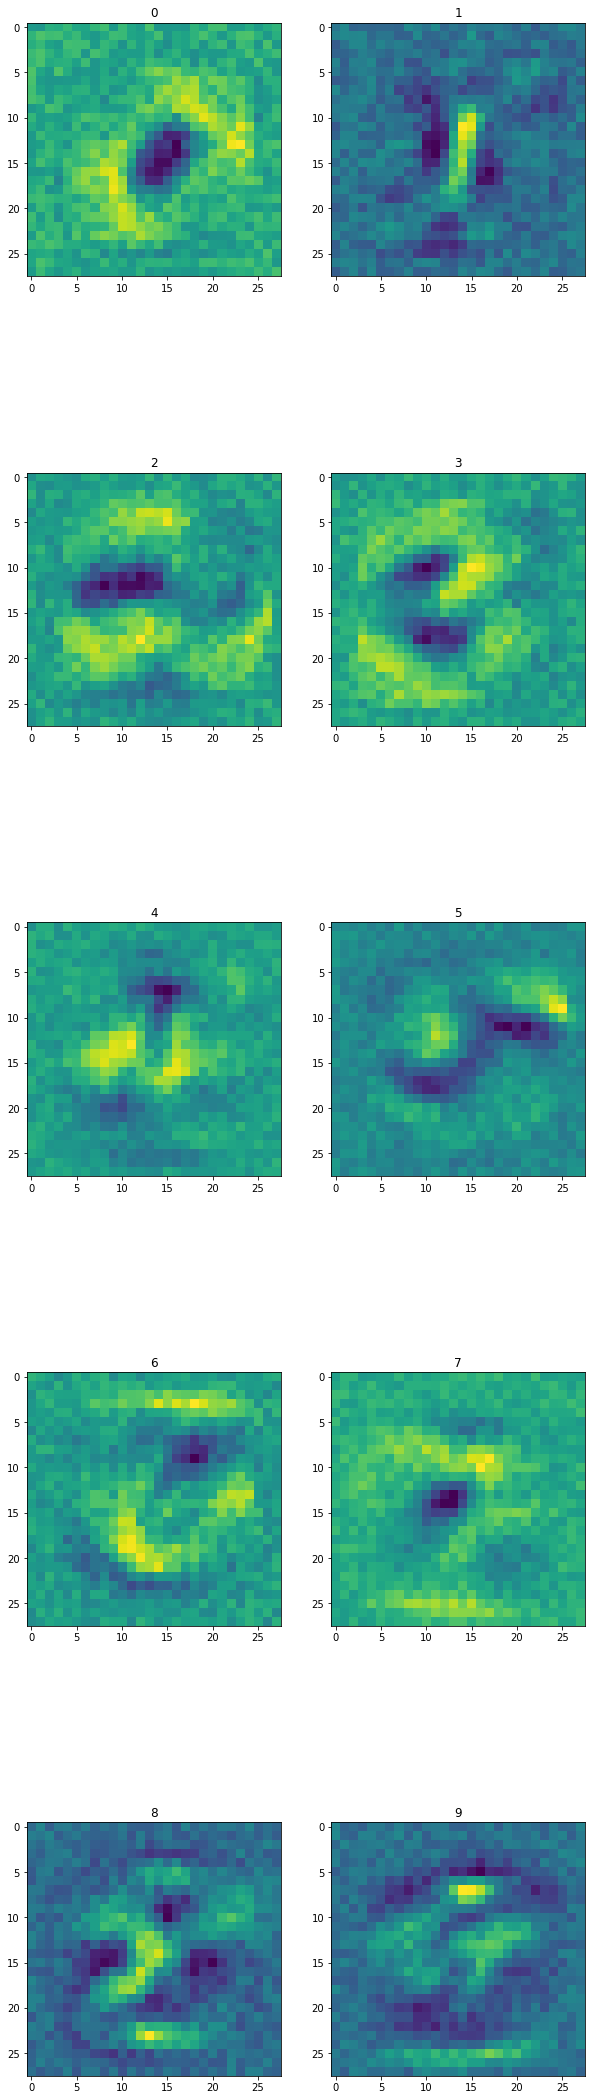

In [ ]:
#visualizing each class's weights
unfolded = list(model.parameters())[0].detach().numpy()
print(unfolded.shape)
fig, axs = plt.subplots(nrows=5, ncols=2)
fig.set_size_inches(10, 40)
label = 0
for ax in axs.ravel():
    ax.imshow(unfolded[label].reshape(28,28))
    ax.set_title(str(label))
    label+=1
plt.show()